## Абстрактные типы в Python
- Встроенные
- Подключаемые

О типах в официальной документации: https://docs.python.org/3/library/stdtypes.html#standard-generic-collections

## Встроенные 

### List, Лист
Реализован как динамический массив 
- имеет 2 размера, физический и логический
- когда элемент добавляется/удаляется меняется логический размер
- если логический размер требует увеличения больше физического, массив пересоздается с размером 2x от предыдушего.
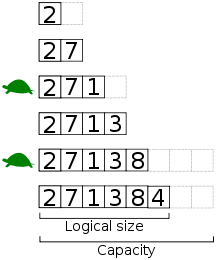

In [1]:
a = list(range(4))
a, [0, 1, 2, 4]

([0, 1, 2, 3], [0, 1, 2, 4])

In [97]:
from sys import getsizeof

list_ = []
prev = 0
cur = getsizeof(list_)
print(f'0: {cur}| +{cur-prev}')
for i in range(1, 30):
    list_.append(None)
    prev = cur
    cur = getsizeof(list_)
    print(f'{i}: {cur}| +{cur-prev}')

0: 56| +56
1: 88| +32
2: 88| +0
3: 88| +0
4: 88| +0
5: 120| +32
6: 120| +0
7: 120| +0
8: 120| +0
9: 184| +64
10: 184| +0
11: 184| +0
12: 184| +0
13: 184| +0
14: 184| +0
15: 184| +0
16: 184| +0
17: 256| +72
18: 256| +0
19: 256| +0
20: 256| +0
21: 256| +0
22: 256| +0
23: 256| +0
24: 256| +0
25: 256| +0
26: 336| +80
27: 336| +0
28: 336| +0
29: 336| +0


> Внимание, метод getsizeof возвращает размер только аттрибьютов объекта, он не рекурсиве

In [10]:
b = 1_000_000_000_000
a = [b]
getsizeof(a), getsizeof(b)

(64, 32)

In [7]:
b = '1_000_000_000_000'
a = [b]
getsizeof(a), getsizeof(b)

(64, 66)

#### Применимость листа
_в основном_ лист используется для тех же целей, что и массив, кортеж и тд. То есть для хранения массива данных. 
Но если вам нужна скорость, неизменяемость или экономичность, лист стоит не использовать. 
> Помните, операчи insert на листе очень медленная 

### Tuple, Кортеж
Реализован как просто статический массив

In [14]:
# Tuple, Кортеж
a = tuple(range(10))
b = (1, 2, 3)
a, b

((0, 1, 2, 3, 4, 5, 6, 7, 8, 9), (1, 2, 3))

In [16]:
list_ = []
tuple_ = tuple()
prev = 0
cur = getsizeof(tuple_)
print(f'0: {cur}| +{cur-prev}')
for i in range(1, 30):
    list_.append(None)
    tuple_ = tuple(list_)
    prev = cur
    cur = getsizeof(tuple_)
    print(f'{i}: {cur}| +{cur-prev}')

0: 40| +40
1: 48| +8
2: 56| +8
3: 64| +8
4: 72| +8
5: 80| +8
6: 88| +8
7: 96| +8
8: 104| +8
9: 112| +8
10: 120| +8
11: 128| +8
12: 136| +8
13: 144| +8
14: 152| +8
15: 160| +8
16: 168| +8
17: 176| +8
18: 184| +8
19: 192| +8
20: 200| +8
21: 208| +8
22: 216| +8
23: 224| +8
24: 232| +8
25: 240| +8
26: 248| +8
27: 256| +8
28: 264| +8
29: 272| +8


#### Применимость кортежа
Кортеж стоит использовать всегда, когда данные не будут меняться. 
Например, при чтение из базы данных строчки записываются в кортежи.  
Также, кортеж стоит использовать в умолчательных значения функций
``` python
# Так делать можно
def func(array: Tuple = (0, 1, 2)):
    print(array)
    
# Так делать *можно*, но не стоит
def func(array: List = [0, 1, 2]):
    print(array)
```

#### Словарь
Словарь реализует ассоциативный массив через хеш-таблицу 
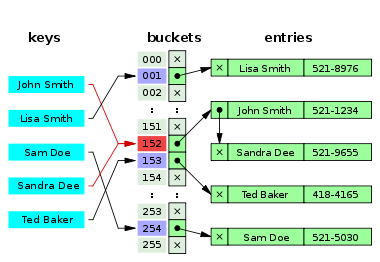

In [24]:
a = {1: 0, 2: 1, 3: -1}
a

{1: 0, 2: 1, 3: -1}

In [25]:
dict_ = dict()
prev = 0
cur = getsizeof(dict_)
print(f'0: {cur}| +{cur-prev}')
for i in range(1, 30):
    dict_.update({i: i})
    prev = cur
    cur = getsizeof(dict_)
    print(f'{i}: {cur}| +{cur-prev}')

0: 232| +232
1: 232| +0
2: 232| +0
3: 232| +0
4: 232| +0
5: 232| +0
6: 360| +128
7: 360| +0
8: 360| +0
9: 360| +0
10: 360| +0
11: 640| +280
12: 640| +0
13: 640| +0
14: 640| +0
15: 640| +0
16: 640| +0
17: 640| +0
18: 640| +0
19: 640| +0
20: 640| +0
21: 640| +0
22: 1176| +536
23: 1176| +0
24: 1176| +0
25: 1176| +0
26: 1176| +0
27: 1176| +0
28: 1176| +0
29: 1176| +0


### Применимость словаря
Всегда когда вам нужен ассоциативный массив ключ-значение, используйте словарь.  
Но помните, что он реализован на хештаблицах, которые по сравнению
с другими реализациями ассоциативных массиво медлены.

### Set, Множество
Массив данных, все элементы которого уникальны  
Де-факто является словарем без значение, то есть реализован как хештаблица, где keys - значения множества.

In [26]:
a = {1, 2, 3}
b = set([1, 2, 3])
a, b

({1, 2, 3}, {1, 2, 3})

In [27]:
set_ = set()
prev = 0
cur = getsizeof(set_)
print(f'0: {cur}| +{cur-prev}')
for i in range(1, 30):
    set_.add(i)
    prev = cur
    cur = getsizeof(set_)
    print(f'{i}: {cur}| +{cur-prev}')

0: 216| +216
1: 216| +0
2: 216| +0
3: 216| +0
4: 216| +0
5: 728| +512
6: 728| +0
7: 728| +0
8: 728| +0
9: 728| +0
10: 728| +0
11: 728| +0
12: 728| +0
13: 728| +0
14: 728| +0
15: 728| +0
16: 728| +0
17: 728| +0
18: 728| +0
19: 2264| +1536
20: 2264| +0
21: 2264| +0
22: 2264| +0
23: 2264| +0
24: 2264| +0
25: 2264| +0
26: 2264| +0
27: 2264| +0
28: 2264| +0
29: 2264| +0


### Применимость множества
> Внимание, множество очень дорогая структура, поэтому используйте только в крайней нужде. 

Set стоит применять в ситуации, когда необходимо найти пересечения, объединения и тд.  
Например, наличие пересечение прав на некий ресурс.

In [73]:
access = {"Admin", "Publisher"}
my_rights = {"Moderator"}

access & my_rights

set()

####  FrozenSet, Замороженное множество
Как set, но не изменяемый

In [75]:
a = frozenset((1, 2, 3))
b = set((2, 3, 4))
a, b, a & b

(frozenset({1, 2, 3}), {2, 3, 4}, frozenset({2, 3}))

In [76]:
list_ = []
set_ = frozenset()
prev = 0
cur = getsizeof(set_)
print(f'0: {cur}| +{cur-prev}')
for i in range(1, 30):
    list_.append(i)
    set_ = frozenset(list_)
    prev = cur
    cur = getsizeof(set_)
    print(f'{i}: {cur}| +{cur-prev}')

0: 216| +216
1: 216| +0
2: 216| +0
3: 216| +0
4: 216| +0
5: 728| +512
6: 728| +0
7: 728| +0
8: 728| +0
9: 728| +0
10: 728| +0
11: 728| +0
12: 728| +0
13: 728| +0
14: 728| +0
15: 728| +0
16: 728| +0
17: 728| +0
18: 728| +0
19: 2264| +1536
20: 2264| +0
21: 2264| +0
22: 2264| +0
23: 2264| +0
24: 2264| +0
25: 2264| +0
26: 2264| +0
27: 2264| +0
28: 2264| +0
29: 2264| +0


#### Применимость frozenset
Аналогично set, но его можно использовать в умолчательных значения функций.
``` python
# Очень-очень плохо
def func(set_: Set = {1, 2, 3}):
    print(set_)
    
# Хорошо
def func(set_: Frozenset = frozenset((1, 2, 3))):
    print(set_)
```

### Подключаемые
Расмотрим типы данных из библиотек:
- collections
- array
- heapq  

In [78]:
"""
ChainMap группирует словари и отображает их в единое, 
обновляемое представление с поведением, подобным поведению словаря, 
а также представляет возможности для эффективного управления 
различными словарями, определения их ключей, свойств и не только. 
"""

from collections import ChainMap


europe = {"Russia": "Moscow", "France": "Paris"}
asia = {"Japan": "Tokyo", "China": "Beijing", 'Seoul': 'South Korea'}

chain_map = ChainMap(europe, asia)
print(chain_map['Japan'], chain_map['Russia'])

"""
ЧейнМэп удобно использовать в ситуации, 
когда требуется обьеденить много словарей в один
""";

Tokyo Moscow


In [80]:
"""
Counter также является словарем, но используется для подсчета. 
Во время инициализации ему можно передать итерируемый объект и он 
посчитает количество входов для каждого элемента
"""

from collections import Counter

animals = Counter(cats=3, dogs=1)
animals['cats']+=1
animals

Counter({'cats': 4, 'dogs': 1})

In [85]:
ode_to_joy = """
Freude, schöner Götterfunken,
Tochter aus Elysium,
Wir betreten feuertrunken,
Himmlische, dein Heiligtum!
Deine Zauber binden wieder
Was die Mode streng geteilt*;
Alle Menschen werden Brüder*
Wo dein sanfter Flügel weilt.
"""

count_letters = Counter(ode_to_joy.lower())
count_letters['f']

5

`Counter` удобен для подсчета(очевидно)

In [89]:
"""
defaultdict 
Наследуется от dict, но при инциализации принимает функцию, которая
используется для умолчательных значений. 
"""
from collections import defaultdict

def simple_str():
    return "string"

d = defaultdict(simple_str)
d['key'] = 10
d['key'], d['nonexisting_key']

(10, 'string')

In [93]:
"""
Аналогичного поведения можно добиться, 
если использовать стандартные словари 
с методом .get(key, default)
"""
d = {'key': 10}
d.get('key', simple_str()), d.get('nonexisting_key', simple_str())

(10, 'string')

`defaultdict` удобно использовать когда требуется часто возвращать умолчательное значение 

### Namedtuple, Именованный кортеж
Кортеж, к полям которого можно обратиться как к атрибутам

In [90]:
from collections import namedtuple
Point = namedtuple('Point', ['x', 'y'])

p = Point(4, 6)
p.x, p.y, type(p)

(4, 6, __main__.Point)

`namedtuple` идеален для десериализации данных  
Например, у вас есть csv файл с данными вида:
``` csv
idx, name, age, avgscore
0, peter, 21, 4
1, artem, 21, 3.5
2, ilia, 20, 5
```
В такой ситуации достаточно создать  
`namedtuple('Student', ['idx', 'name', 'age', 'avgscore'])`  
К которому можно будет обращаться по атрибутам

### Array, Массив
Работает аналогично листу за тем исключением, что в него можно класть элементы одного типа

In [93]:
from array import array
a = array('i', [1, 2, 3])
a, a[2]

(array('i', [1, 2, 3]), 3)

In [103]:
array_ = array('i')
prev = 0
cur = getsizeof(array_)
print(f'0: {cur}| +{cur-prev}')
for i in range(1, 30):
    array_.append(i)
    prev = cur
    cur = getsizeof(array_)
    print(f'{i}: {cur}| +{cur-prev}')

0: 64| +64
1: 80| +16
2: 80| +0
3: 80| +0
4: 80| +0
5: 96| +16
6: 96| +0
7: 96| +0
8: 96| +0
9: 128| +32
10: 128| +0
11: 128| +0
12: 128| +0
13: 128| +0
14: 128| +0
15: 128| +0
16: 128| +0
17: 164| +36
18: 164| +0
19: 164| +0
20: 164| +0
21: 164| +0
22: 164| +0
23: 164| +0
24: 164| +0
25: 164| +0
26: 200| +36
27: 200| +0
28: 200| +0
29: 200| +0


`Array` стоит использовать в ситуации, когда есть гарантия, что в массиве будут присутствовать данные одного простого типа.  
В таком случае `Array` экономичнее `List`'а

### Deque, Double-ended queue, Дек, Двусторонняя очередь
Реализована как двусторонняя очередь
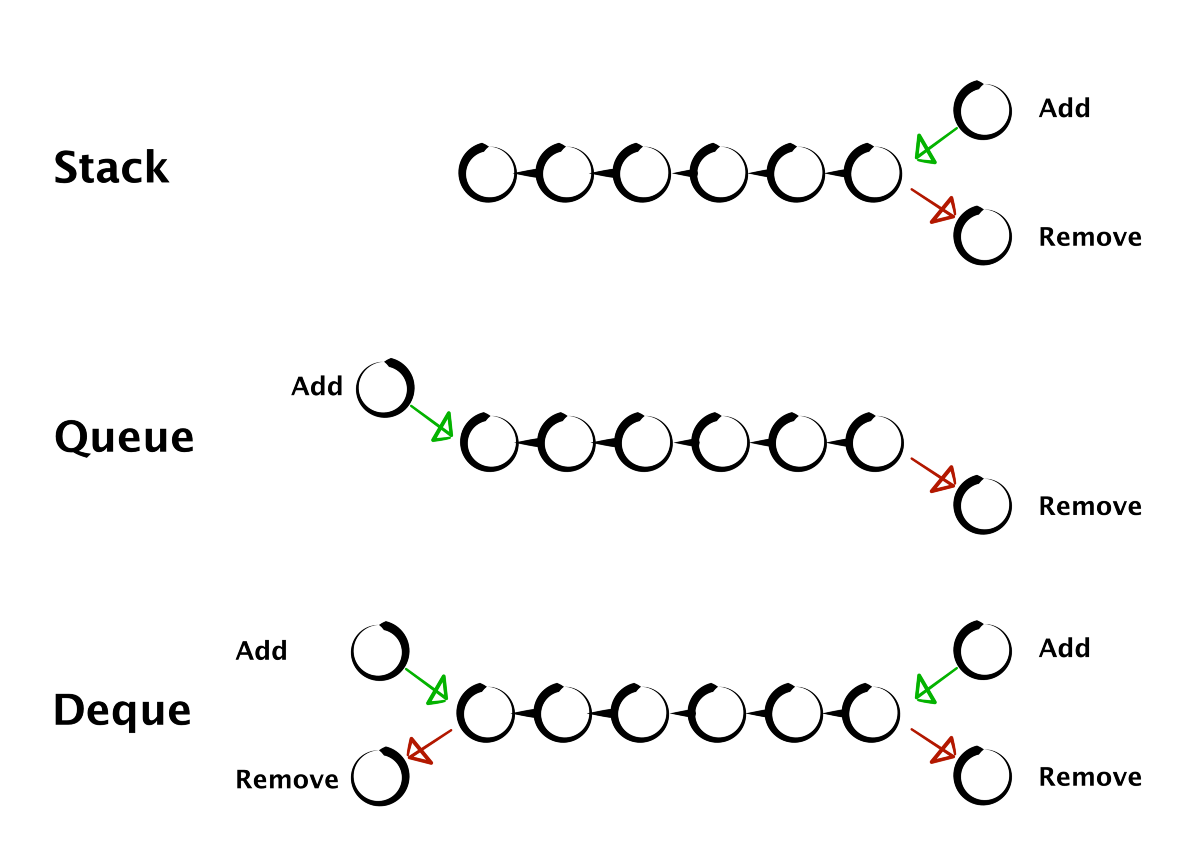
За одним исключением, ноды данной очереди представляют собой блоки по 64 элементов в виде массива

In [106]:
from collections import deque

d = deque(range(4), maxlen=8)
d

deque([0, 1, 2, 3])

In [130]:
d.appendleft(-1)
d.append(5)
d

deque([-1, -1, -1, -1, 5, 5, 5, 5])

In [132]:
d.pop(), d.popleft()

(5, -1)

In [135]:
deque_ = deque()
prev = 0
cur = getsizeof(deque_)
print(f'0: {cur}| +{cur-prev}')
for i in range(1, 200):
    deque_.append(i)
    prev = cur
    cur = getsizeof(deque_)
    print(f'{i}: {cur}| +{cur-prev}')

0: 624| +624
1: 624| +0
2: 624| +0
3: 624| +0
4: 624| +0
5: 624| +0
6: 624| +0
7: 624| +0
8: 624| +0
9: 624| +0
10: 624| +0
11: 624| +0
12: 624| +0
13: 624| +0
14: 624| +0
15: 624| +0
16: 624| +0
17: 624| +0
18: 624| +0
19: 624| +0
20: 624| +0
21: 624| +0
22: 624| +0
23: 624| +0
24: 624| +0
25: 624| +0
26: 624| +0
27: 624| +0
28: 624| +0
29: 624| +0
30: 624| +0
31: 624| +0
32: 624| +0
33: 1152| +528
34: 1152| +0
35: 1152| +0
36: 1152| +0
37: 1152| +0
38: 1152| +0
39: 1152| +0
40: 1152| +0
41: 1152| +0
42: 1152| +0
43: 1152| +0
44: 1152| +0
45: 1152| +0
46: 1152| +0
47: 1152| +0
48: 1152| +0
49: 1152| +0
50: 1152| +0
51: 1152| +0
52: 1152| +0
53: 1152| +0
54: 1152| +0
55: 1152| +0
56: 1152| +0
57: 1152| +0
58: 1152| +0
59: 1152| +0
60: 1152| +0
61: 1152| +0
62: 1152| +0
63: 1152| +0
64: 1152| +0
65: 1152| +0
66: 1152| +0
67: 1152| +0
68: 1152| +0
69: 1152| +0
70: 1152| +0
71: 1152| +0
72: 1152| +0
73: 1152| +0
74: 1152| +0
75: 1152| +0
76: 1152| +0
77: 1152| +0
78: 1152| +0
79: 1152| +0

### Когда использовать Deque?
Если вам необходимо часто проводить операции pop, popleft, append, appendleft, то deque будет быстрее чем list.
Но в тоже время list на малых данные будет экономичнее и быстрее.

###  HeapQ, Бинарная куча
Реализована как надстройка над листами
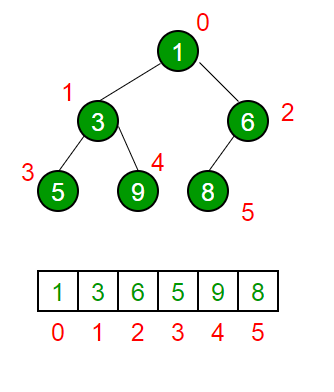

In [136]:
from heapq import *

h = []
heappush(h, (5, 'Купить колбасы'))
heappush(h, (1, 'Выйти на улицу'))
heappush(h, (6, 'Выйти из магазина'))
heappush(h, (14, 'Покушать'))
heappush(h, (3, 'Пойти в магазин'))
heappush(h, (8, 'Вернуться домой'))
heappush(h, (9, 'Приготовить бутерброт'))
h

[(1, 'Выйти на улицу'),
 (3, 'Пойти в магазин'),
 (6, 'Выйти из магазина'),
 (14, 'Покушать'),
 (5, 'Купить колбасы'),
 (8, 'Вернуться домой'),
 (9, 'Приготовить бутерброт')]

In [137]:
while True:
    try:
        print(heappop(h))
    except IndexError:
        break

(1, 'Выйти на улицу')
(3, 'Пойти в магазин')
(5, 'Купить колбасы')
(6, 'Выйти из магазина')
(8, 'Вернуться домой')
(9, 'Приготовить бутерброт')
(14, 'Покушать')


Зачем?

Бинарная куча часто используется как структура для определенных алгоритмов.
Например, она использутся во внешней сортировку k-way merge sort.
